In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
import seaborn as snb
import matplotlib.pyplot as plt

In [2]:
# Read the dataset
data = pd.read_csv('abalone.csv')
data.head(10)

,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
5,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
6,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
7,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
8,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19
9,F,0.525,0.380,0.140,0.6065,0.1940,0.1475,0.210,14


In [3]:
#include the column names in the dataset
headers = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']
data = pd.read_csv('abalone.csv', names=headers)
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
data.shape

(4177, 9)

In [5]:
#check for the types of columns in the dataset
data.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [6]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [7]:
print(data.columns)

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')


In [8]:
#check or the missing values in the dataset
data.isna().any()

Sex               False
Length            False
Diameter          False
Height            False
Whole weight      False
Shucked weight    False
Viscera weight    False
Shell weight      False
Rings             False
dtype: bool

In [9]:
#M:male, I:infants, F:Females
print(data['Sex'].value_counts())

M    1528
I    1342
F    1307
Name: Sex, dtype: int64


In [10]:
#Find the Average age(here, 'Rings') by Sex.
class_by_sex = data[['Sex', 'Rings']]
print(class_by_sex.groupby('Sex', as_index=False)['Rings'].mean())

  Sex      Rings
0   F  11.129304
1   I   7.890462
2   M  10.705497


E:\Program Files\Anaconda\lib\site-packages\IPython\core\events.py:88: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  func(*args, **kwargs)


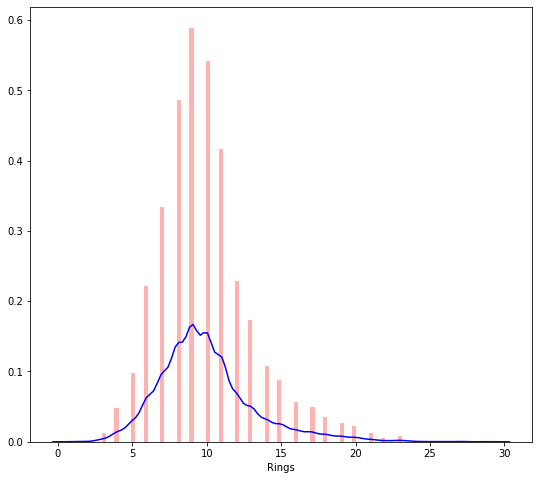

In [11]:
# Check the distribution of the Target variable('Rings')
plt.figure(figsize=(9, 8))
snb.distplot(data['Rings'], color='B', bins=100, hist_kws={'color':'Red','alpha':0.3})

In [12]:
#Convert the Object type features into Int.
map = {'I':1, 'M':2, 'F':3}
data.replace({'Sex':map}, inplace=True)

In [13]:
data.dtypes

Sex                 int64
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

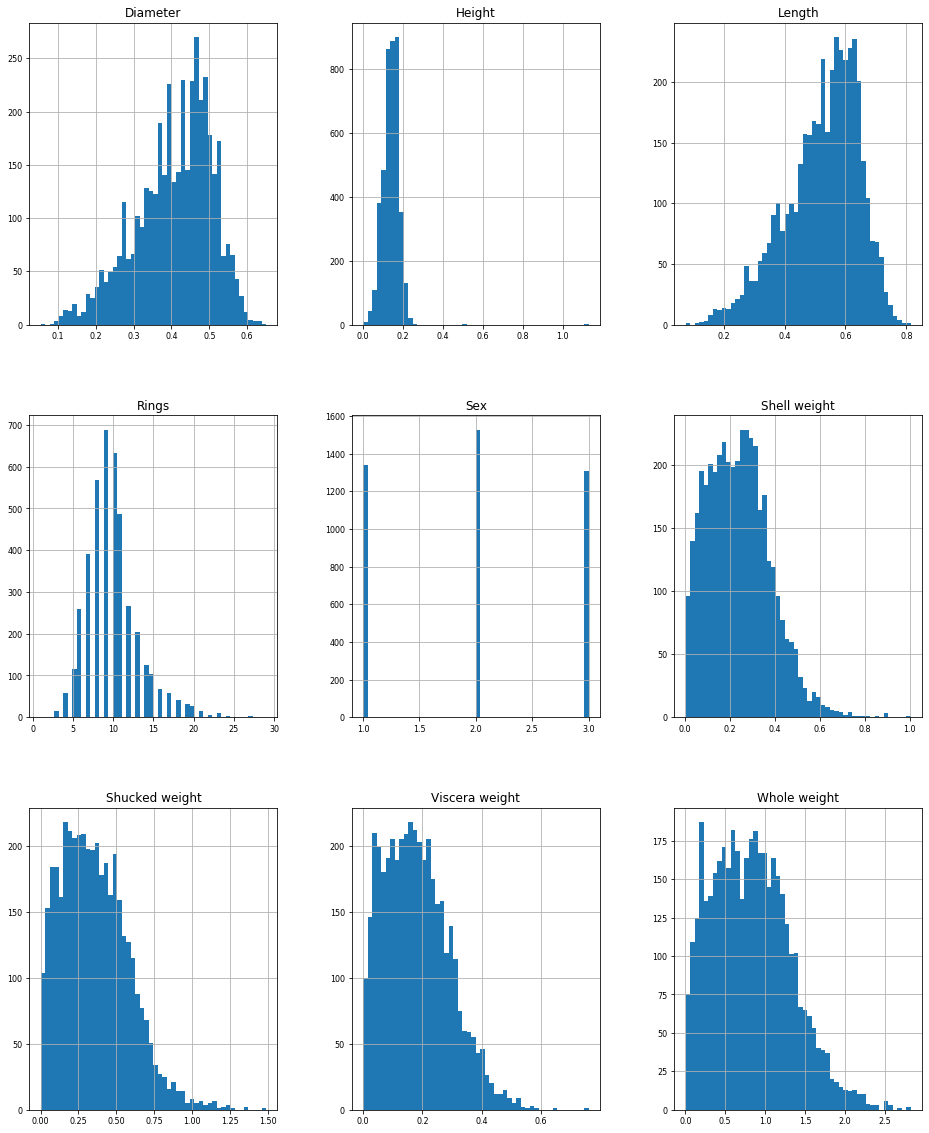

In [14]:
#visualizing the data varibles to analyse the data distribution.
data.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)
plt.show()

* From above visualizations, It can be said that all the weight features share a similar distribution to 'Rings' vector 

In [15]:
# finding the correlation of feture variables and target variables.
data_corr = data.corr()['Rings'][:-1]
print(data_corr)

Sex               0.401445
Length            0.556720
Diameter          0.574660
Height            0.557467
Whole weight      0.540390
Shucked weight    0.420884
Viscera weight    0.503819
Shell weight      0.627574
Name: Rings, dtype: float64


In [16]:
#Finding strongly correlated variables.
Strong_features = data_corr[abs(data_corr) > 0.5].sort_values(ascending=False)
print(Strong_features)

Shell weight      0.627574
Diameter          0.574660
Height            0.557467
Length            0.556720
Whole weight      0.540390
Viscera weight    0.503819
Name: Rings, dtype: float64


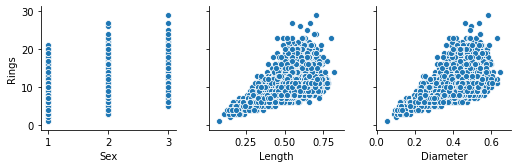

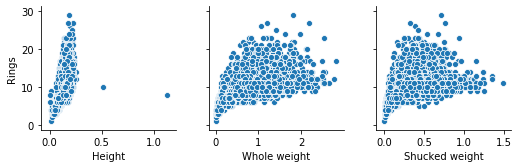

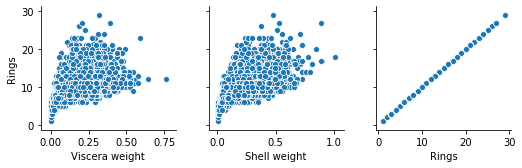

In [17]:
# Visualizing the feature variables with respect to Target variables('Rings') to identify the relationship.
for i in range(0, len(data.columns), 3):
    snb.pairplot(data=data, x_vars=data.columns[i:i+3], y_vars=['Rings'])

In [18]:
#Find the 'Mean,Max and Average' Age of different Genders.
Sex_stats = (data.groupby('Sex')['Rings']).agg({'Statistics' : ['mean', 'min', 'max']})

E:\Program Files\Anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  


In [19]:
print(Sex_stats)

    Statistics        
          mean min max
Sex                   
1     7.890462   1  21
2    10.705497   3  27
3    11.129304   5  29
